In [11]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import json

In [12]:
COLORS = [
        "#ebce2b",
        "#db6917",
        "#96cde6",
        "#ba1c30",
        "#fecb00",    
        "#c0bd7f",
    
        "#00247d",
        "#d485b2",
        "#4277b6",
        "#92ae31",
        
        "#e1a11a",
        "#6f340d",
        
        "#d32b1e",
        "#df8461",
        "#01a263",
        "#fecb00",
        "#cd0d2d",
        "#00247d",
        "#01a263",
        "#fecb00",
        "#cd0d2d",
        "#00247d",
            
    "#cd0d2d",
    "#e8e948",
    "#463397",
    ]
markers = ['$b$', '$m$', '$m$', '$m$','$\omega$','$\omega$','v', 'v','*','*', 'D', 'P', 'X', 'X','^','^','^','^','$q$','$g$','$g$','$g$','$\omega$','P','s']
keywords_list = [
    "b97-d3bj/def2-tzvp",
    "m05-2x-d3/dzvp",
    "m06-2x-d3/dzvp",
    "m08-hx-d3/dzvp",
    "wb97x-d3bj/dzvp",
    "wb97m-d3bj/dzvp",
    
    "pw6b95-d3bj/dzvp",
    "pw6b95-d3/dzvp",
    "mp2/aug-cc-pvtz",
    "mp2/heavy-aug-cc-pvtz",
    
    "b3lyp-d3bj/dzvp",
    "b3lyp-d3mbj/dzvp",
    
    "b3lyp-d3bj/def2-sv(p)",
    "b3lyp-d3bj/def2-svp",
    "b3lyp-d3bj/def2-tzvp",
    "b3lyp-d3bj/def2-tzvpd",
    "b3lyp-d3bj/def2-tzvpp",
    "b3lyp-d3bj/def2-tzvppd",
    "b3lyp-d3bj/def2-qzvp",
    "b3lyp-d3bj/6-31g*",
    "b3lyp-d3bj/6-31+g**",
    "b3lyp-d3bj/6-311+g**",
    "wb97m-v/dzvp",
    "b3lyp-nl/dzvp",
    "dsd-blyp-d3bj/heavy-aug-cc-pvtz",
]


In [13]:
# wall times of smaller calculations were averaged over ten single point runs of different geometries of the same molecule
with open('./data/timings_averaged_over_ten_single_points_of_molecule_0.json', 'r') as file:
    wall_times = json.load(file)
# wall times of longer calculations were taken from a single run of the same molecule as above    
with open('./data/timings_averaged_over_ten_single_points_of_molecule_0_energies_only.json','r') as file:
    energy_wall_times = json.load(file)


#NOTE: The std deviations were less than a second for all the calculations so the error bars were not plotted for walltimes 
#      that were averaged out

In [14]:
type(wall_times['b3lyp-d3bj/dzvp']['Mean'])

float

In [15]:
with open('./data/all_methods_statistics.json', 'r') as file:
    stats = json.load(file)

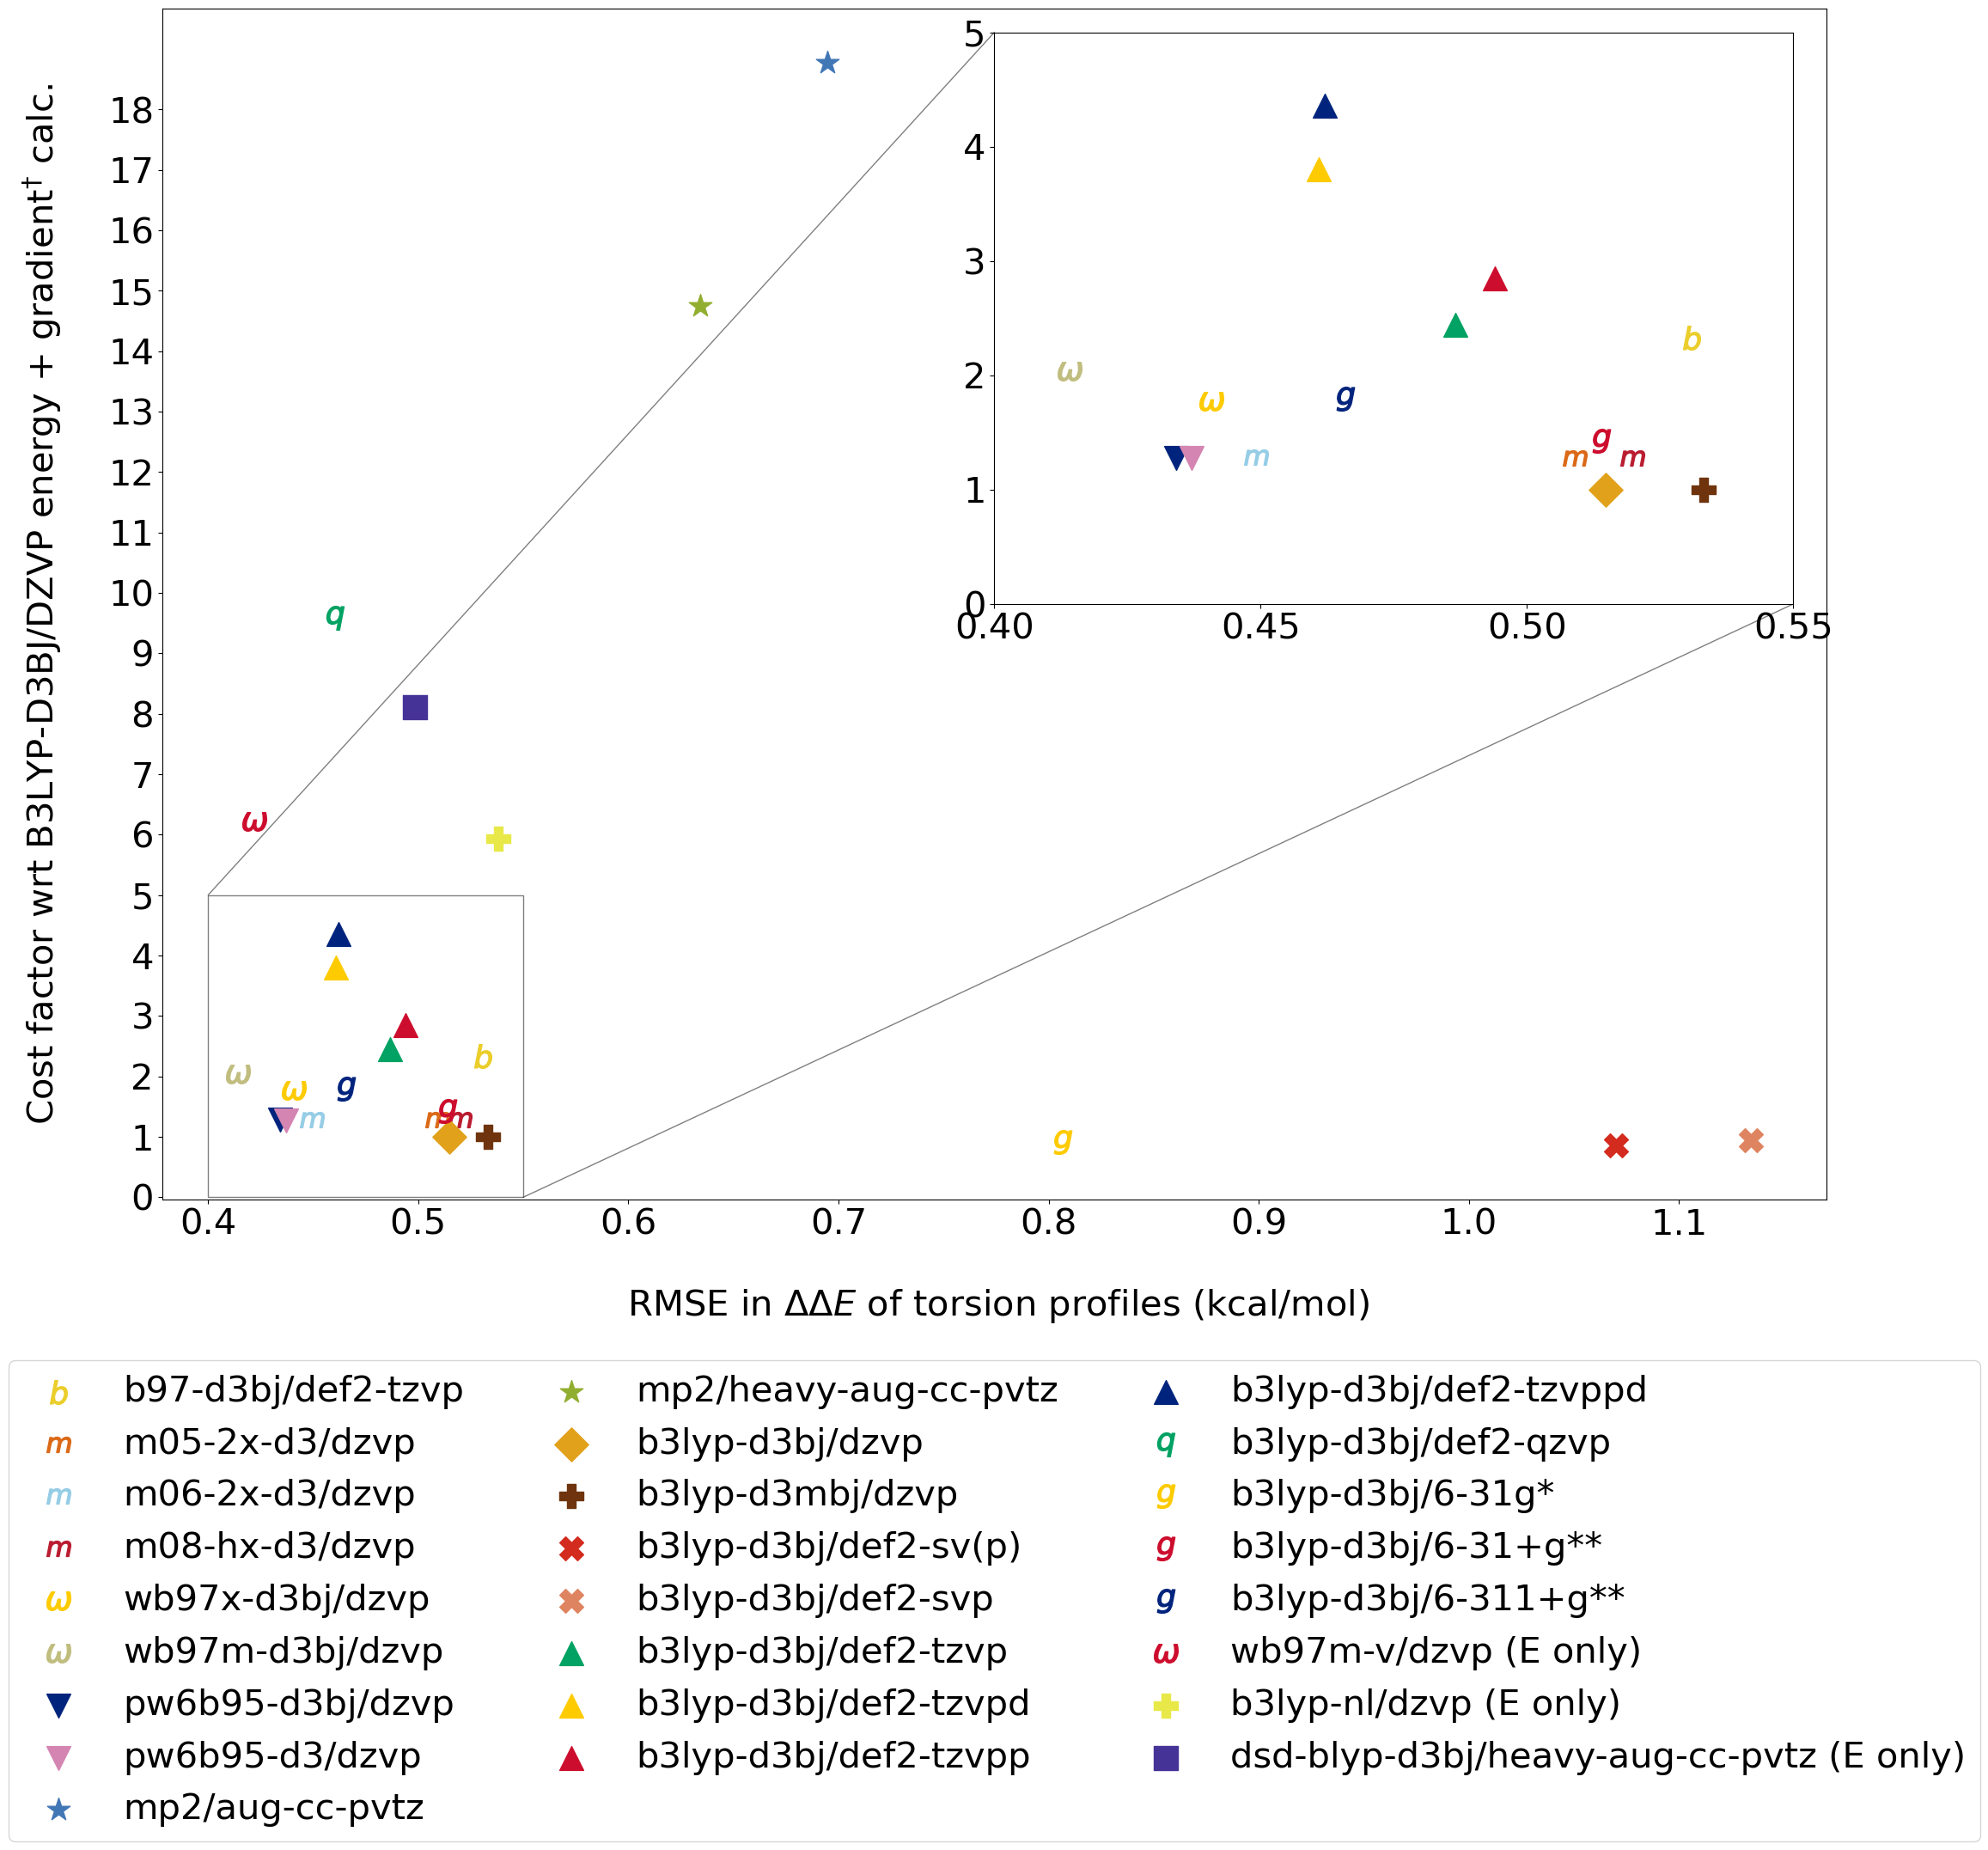

In [95]:
cost_factor = []
for key in keywords_list:
    if key in wall_times.keys():
        cost_factor.append(wall_times[key]['Mean']/wall_times['b3lyp-d3bj/dzvp']['Mean'])
    else:
        cost_factor.append(energy_wall_times[key]['Mean']/energy_wall_times['b3lyp-d3bj/dzvp']['Mean'])
rmses = [float(stats[key]['RMSE']) for key in keywords_list]

fig, ax = plt.subplots(figsize=(25,18))
rcParams.update({"font.size": 30})

for i, key in enumerate(keywords_list):
    if key in ['dsd-blyp-d3bj/heavy-aug-cc-pvtz', 'wb97m-v/dzvp', 'b3lyp-nl/dzvp']:
        plt.scatter(rmses[i], cost_factor[i],  marker=markers[i], s=400, c=COLORS[i], label=key+' (E only)')
    else:
        plt.scatter(rmses[i], cost_factor[i],  marker=markers[i], s=400, c=COLORS[i], label=key)
plt.yticks(np.arange(0,19,1), fontsize=30)

# inset axes....
x1, x2, y1, y2 = 0.4, 0.55, 0, 5  # subregion of the original image
axins = ax.inset_axes(
    [0.5, 0.5, 0.48, 0.48],
    xlim=(x1, x2), ylim=(y1, y2)) 
for i, key in enumerate(keywords_list):
    if key in ['dsd-blyp-d3bj/heavy-aug-cc-pvtz', 'wb97m-v/dzvp', 'b3lyp-nl/dzvp']:
        axins.scatter(rmses[i], cost_factor[i],  marker=markers[i], s=400, c=COLORS[i], label=key+' (E only)')
    else:
        axins.scatter(rmses[i], cost_factor[i],  marker=markers[i], s=400, c=COLORS[i], label=key)
axins.set_xticks(np.linspace(40,55,4)/100)

ax.indicate_inset_zoom(axins, edgecolor="black")
plt.xlabel("\n RMSE in $\Delta \Delta E$ of torsion profiles (kcal/mol) \n", fontsize=30)
plt.ylabel("Cost factor wrt B3LYP-D3BJ/DZVP energy + gradient$^{\dagger}$ calc.\n", fontsize=30)
plt.setp(ax.get_xticklabels(), fontsize=30)
plt.setp(ax.get_yticklabels(), fontsize=30)
# plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.legend(loc='upper center',  bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=False, ncol=3, fontsize=30)
plt.show()

In [97]:
pdf = PdfPages("./output/figure5_wall_times_versus_rmses.pdf")
pdf.savefig(fig, dpi=600, bbox_inches="tight")   
pdf.close()

In [18]:
for i, key in enumerate(keywords_list):
    if key in ['dsd-blyp-d3bj/heavy-aug-cc-pvtz', 'wb97m-v/dzvp', 'b3lyp-nl/dzvp']:
        print(f"{key.upper()} & {'%.2f' % energy_wall_times[key]['Mean']}\\pm {'%.2f' % energy_wall_times[key]['Stdev']} & {'%.2f' % cost_factor[i]} & {rmses[i]}\\\\ \\vspace{{2mm}}")
    else:
        print(f"{key.upper()} & {'%.2f' % wall_times[key]['Mean']}\\pm {'%.2f' % wall_times[key]['Stdev']} & {'%.2f' % cost_factor[i]} & {rmses[i]}\\\\ \\vspace{{2mm}}")

B97-D3BJ/DEF2-TZVP & 49.41\pm 1.10 & 2.33 & 0.5309\\ \vspace{2mm}
M05-2X-D3/DZVP & 27.05\pm 0.42 & 1.28 & 0.5089\\ \vspace{2mm}
M06-2X-D3/DZVP & 27.26\pm 0.35 & 1.29 & 0.4492\\ \vspace{2mm}
M08-HX-D3/DZVP & 27.06\pm 0.49 & 1.28 & 0.5197\\ \vspace{2mm}
WB97X-D3BJ/DZVP & 37.49\pm 0.84 & 1.77 & 0.4408\\ \vspace{2mm}
WB97M-D3BJ/DZVP & 43.17\pm 0.82 & 2.04 & 0.4141\\ \vspace{2mm}
PW6B95-D3BJ/DZVP & 27.11\pm 0.39 & 1.28 & 0.4341\\ \vspace{2mm}
PW6B95-D3/DZVP & 26.98\pm 0.33 & 1.27 & 0.4371\\ \vspace{2mm}
MP2/AUG-CC-PVTZ & 397.87\pm 15.91 & 18.78 & 0.6947\\ \vspace{2mm}
MP2/HEAVY-AUG-CC-PVTZ & 312.62\pm 12.16 & 14.75 & 0.6341\\ \vspace{2mm}
B3LYP-D3BJ/DZVP & 21.19\pm 0.24 & 1.00 & 0.5148\\ \vspace{2mm}
B3LYP-D3MBJ/DZVP & 21.21\pm 0.21 & 1.00 & 0.5332\\ \vspace{2mm}
B3LYP-D3BJ/DEF2-SV(P) & 18.21\pm 0.36 & 0.86 & 1.0702\\ \vspace{2mm}
B3LYP-D3BJ/DEF2-SVP & 19.89\pm 0.17 & 0.94 & 1.1343\\ \vspace{2mm}
B3LYP-D3BJ/DEF2-TZVP & 51.80\pm 0.63 & 2.44 & 0.4866\\ \vspace{2mm}
B3LYP-D3BJ/DEF2-TZVPD & 80.

In [36]:
with open('./data/timings_data_basis.json','r') as file:
    basis_wall_times = json.load(file)

In [40]:
nbasis = [basis_wall_times[str(i)]['nbasis'] for i in range(59)]
b_wall_times = [basis_wall_times[str(i)]['wall_time'] for i in range(59)]

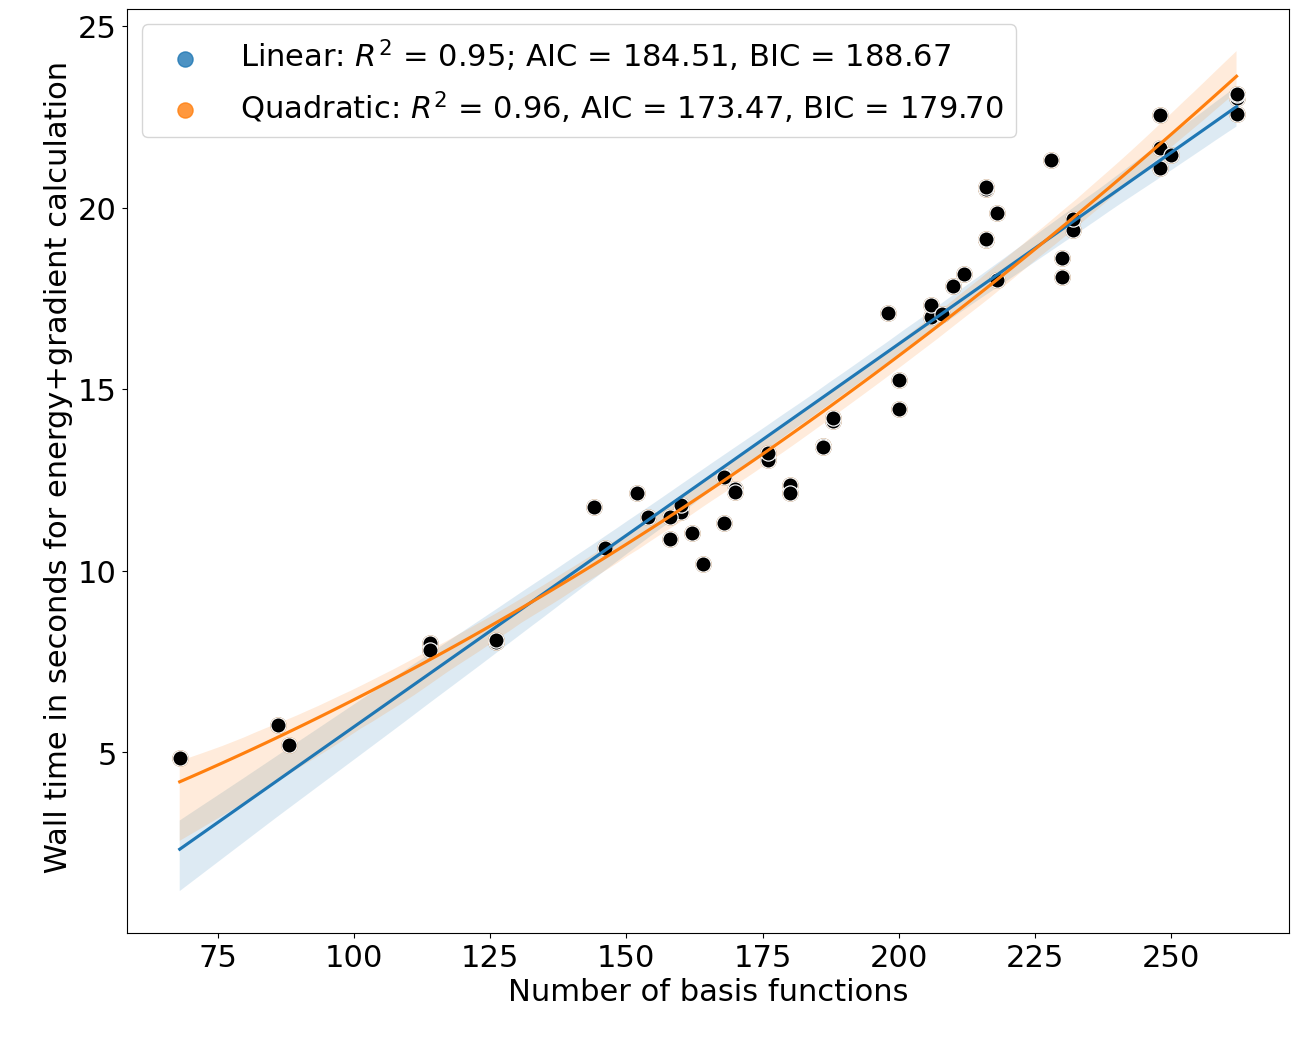

In [59]:
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D


fig = plt.figure(figsize=(15,12))
sns.regplot(x=nbasis, y=b_wall_times, scatter_kws={'s':119}, label="Linear: $R^2$ = 0.95; AIC = 184.51, BIC = 188.67")
sns.regplot(x=nbasis, y=b_wall_times, scatter_kws={'s':119}, order=2, label="Quadratic: $R^2$ = 0.96, AIC = 173.47, BIC = 179.70")

plt.legend()
plt.xlabel("Number of basis functions\n")
plt.ylabel("\n Wall time in seconds for energy+gradient calculation")
sns.scatterplot(x=nbasis, y=b_wall_times, color="black", s=120)
plt.show()


In [60]:
pdf = PdfPages("./output/wall_times_versus_basis.pdf")
pdf.savefig(fig, dpi=600, bbox_inches="tight")   
pdf.close()

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
x = nbasis
y = b_wall_times
# Reshape x for sklearn
x_reshaped = np.array(x).reshape(-1, 1)

# Fit linear regression model
linear_reg = LinearRegression()
linear_reg.fit(x_reshaped, y)
linear_r2 = r2_score(y, linear_reg.predict(x_reshaped))

# Fit quadratic regression model
poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x_reshaped)
quad_reg = LinearRegression()
quad_reg.fit(x_poly, y)
quad_r2 = r2_score(y, quad_reg.predict(x_poly))

print(f"R-squared (Linear): {linear_r2}")
print(f"R-squared (Quadratic): {quad_r2}")


R-squared (Linear): 0.9497265280013787
R-squared (Quadratic): 0.959696688699053


In [33]:
import numpy as np
import statsmodels.api as sm

# Define your data
x = np.array([68, 86, 88, 114, 114, 126, 126, 144, 146, 152, 154, 158, 158, 160, 160, 162, 164, 168, 168, 168, 170, 170, 170, 176, 176, 180, 180, 186, 186, 188, 188, 198, 200, 200, 206, 206, 208, 210, 212, 216, 216, 216, 216, 218, 218, 228, 230, 230, 232, 232, 248, 248, 248, 250, 262, 262, 262, 262, 262])
y = np.array([4.833682537078857, 5.7598490715026855, 5.209689140319824, 7.805615425109863, 8.000149488449097, 8.024504661560059, 8.079852104187012, 11.747379541397095, 10.637939214706421, 12.137436151504517, 11.481771469116211, 10.872300863265991, 11.476759433746338, 11.61264443397522, 11.810508012771606, 11.028974056243896, 10.192042827606201, 11.326770067214966, 12.573375701904297, 12.6155526638031, 12.179120063781738, 12.200304985046387, 12.242209434509277, 13.060278415679932, 13.254266500473022, 12.138602495193481, 12.352813959121704, 13.40047836303711, 13.442220449447632, 14.116684198379517, 14.21228575706482, 17.08268690109253, 14.452828168869019, 15.247639179229736, 16.97542405128479, 17.326392650604248, 17.07046365737915, 17.844335794448853, 18.15914797782898, 19.10968041419983, 19.137532472610474, 20.516527891159058, 20.577423810958862, 17.994046449661255, 19.857516050338745, 21.318748235702515, 18.092971086502075, 18.621708154678345, 19.378361225128174, 19.673308610916138, 21.08305263519287, 21.629703044891357, 22.535220861434937, 21.441569089889526, 22.56829524040222, 23.012479543685913, 23.097262144088745, 23.109571933746338, 23.130292892456055])

# Linear regression
x_linear = sm.add_constant(x)
model_linear = sm.OLS(y, x_linear).fit()
aic_linear = model_linear.aic
bic_linear = model_linear.bic

# Quadratic regression
x_quad = np.column_stack((x, x**2))
x_quad = sm.add_constant(x_quad)
model_quad = sm.OLS(y, x_quad).fit()
aic_quad = model_quad.aic
bic_quad = model_quad.bic

print("AIC (Linear):", aic_linear)
print("BIC (Linear):", bic_linear)
print("AIC (Quadratic):", aic_quad)
print("BIC (Quadratic):", bic_quad)


AIC (Linear): 184.51046776520215
BIC (Linear): 188.6655426530136
AIC (Quadratic): 173.46887704710264
BIC (Quadratic): 179.7014893788198
